In [1]:
from vehicle_detection_pipeline import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%load_ext autoreload 
%autoreload 2
%matplotlib inline  

In [18]:
orig_img = mpimg.imread('./test_image.jpg')
shape = orig_img.shape
# load a pe-trained svc model from a serialized (pickle) file
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
my_svc_model = pickle.load(open('svc_model.pkl','rb'))
my_scaler = pickle.load(open('svc_scaler.pkl','rb'))
# get attributes of our svc object
svc = my_svc_model #dist_pickle["svc"]
X_scaler = my_scaler #dist_pickle["scaler"]
orient = 9 #dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = 32#dist_pickle["hist_bins"]


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearSVC from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [19]:
X_scaler.mean_.shape

(8460,)

In [20]:
print(cell_per_block, pix_per_cell)

2 8


In [36]:
ystart = orig_img.shape[1]//3
ystop = orig_img.shape[1]
print(ystart,ystop)
scale = 1.5
heat_map = np.zeros((orig_img.shape[0], orig_img.shape[1]))
heat_map, labels = slide_windows_and_update_heat_map(orig_img, ystart,
                                      ystop, scale, svc,
                                      X_scaler, orient,
                                          pix_per_cell,
                                          cell_per_block,
                                          spatial_size, hist_bins,
                                          window_size=64,
                                          cells_per_step=2,
                                          threshold=1,
                                         heat_map=heat_map)

426 1280
hog shape (23, 105, 2, 2, 9)


In [37]:
len(np.where(heat_map == 1)[0])

68544

Box  ((426, 840), (521, 935))
Box  ((426, 1056), (521, 1271))
Box  ((450, 24), (545, 119))
Box  ((546, 24), (713, 431))
Box  ((594, 504), (689, 599))
Box  ((594, 720), (689, 911))


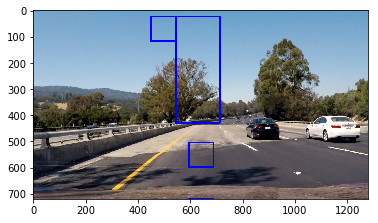

In [40]:
copy_img = np.copy(orig_img)
draw_bounding_boxes_from_labels(copy_img, labels)
plt.imshow(copy_img)

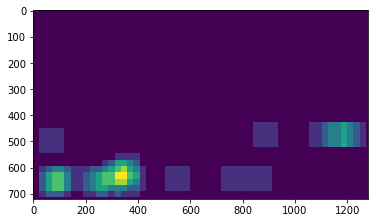

In [39]:
plt.figure()
plt.imshow(heat_map)

In [25]:
heat_map.shape

(720, 1280)